Mount drive to google colab

In [37]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import the libaries

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

For the variance graph to show variance of PCA

In [39]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


<ipython-input-39-eab2e2cd7657>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [40]:
pokemon = pd.read_csv('/content/drive/MyDrive/pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [41]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

To simplify the data, let's use the effective types and the base stats to determine the pokemon type

In [42]:
type1 = pokemon.pop('type1')
type2 = pokemon.pop('type2')
stats = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']

In [43]:
stats_attribute = pokemon[stats]

In [44]:
stats_scaled = (stats_attribute - stats_attribute.mean(axis=0))/stats_attribute.std(axis=0)

In [45]:
stats_scaled

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,against_psychic,against_rock,against_steel,against_water,attack,defense,hp,sp_attack,sp_defense,speed
0,0.006271,-0.130360,0.088402,-0.876341,-1.089645,-0.788487,1.249608,1.335207,0.026836,-0.993819,...,2.008741,-0.359052,0.033076,-0.920540,-0.897349,-0.780286,-0.901520,-0.194903,-0.211554,-0.738025
1,0.006271,-0.130360,0.088402,-0.876341,-1.089645,-0.788487,1.249608,1.335207,0.026836,-0.993819,...,2.008741,-0.359052,0.033076,-0.920540,-0.493105,-0.325285,-0.337101,0.268720,0.325262,-0.219132
2,0.006271,-0.130360,0.088402,-0.876341,-1.089645,-0.788487,1.249608,1.335207,0.026836,-0.993819,...,2.008741,-0.359052,0.033076,-0.920540,0.688530,1.624720,0.415457,1.566867,1.756773,0.472727
3,-0.830903,-0.130360,0.088402,-0.112938,-1.089645,-0.091381,-0.918484,-0.319086,0.026836,-0.676921,...,-0.010715,1.075364,-0.966691,1.552414,-0.804062,-0.975286,-1.127287,-0.349445,-0.748371,-0.046167
4,-0.830903,-0.130360,0.088402,-0.112938,-1.089645,-0.091381,-0.918484,-0.319086,0.026836,-0.676921,...,-0.010715,1.075364,-0.966691,1.552414,-0.430914,-0.487785,-0.412357,0.268720,-0.211554,0.472727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-1.249490,-0.130360,-1.327798,1.413869,-1.089645,-0.091381,1.249608,-1.146233,0.026836,-0.993819,...,-1.020443,-0.359052,-0.966691,-0.096222,0.719626,0.974718,1.055132,1.103243,1.076806,-0.184539
797,0.006271,-0.130360,-1.327798,-0.876341,-1.089645,1.302831,4.140397,-0.319086,0.026836,-0.993819,...,-1.020443,-1.076259,-0.966691,-0.920540,3.207279,1.884720,-0.374729,-0.380353,-1.428339,1.475921
798,1.680618,-1.271544,2.920801,-0.876341,5.613194,1.302831,-0.918484,-0.319086,-0.868810,-0.676921,...,-2.030170,-0.359052,0.033076,-0.920540,0.719626,-0.650286,5.796249,0.794161,-0.641008,-0.807211
799,1.680618,2.152007,0.088402,-0.112938,-0.132096,-0.788487,-0.195787,-0.319086,1.818127,-0.043124,...,-1.020443,-0.359052,0.033076,-0.096222,0.906200,0.909718,1.055132,1.721408,0.647352,0.438134


In [46]:
from sklearn.decomposition import PCA

# --- Create principal components
pca = PCA()
X_pca = pca.fit_transform(stats_scaled)

# --- Convert to dataframe
component_name = ["PC{}".format(i+1) for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = component_name)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-2.308798,-0.791408,-1.274129,0.768308,1.399410,1.135654,-1.388258,-0.262526,-0.429185,0.504030,...,-0.414617,-0.328873,-0.449182,0.080275,-0.359209,0.356503,0.122072,0.032904,0.167244,-0.221782
1,-1.989914,0.207693,-1.013707,0.403964,1.654352,0.989151,-1.458496,-0.235381,-0.509223,0.567407,...,-0.277846,-0.350045,-0.378019,-0.008494,-0.350946,0.313909,0.169309,0.029452,0.174120,-0.206375
2,-1.008733,2.716337,-0.437202,-0.258092,2.486692,0.597306,-1.734566,-0.024900,-0.206877,0.877850,...,-0.454000,-0.265437,-0.353411,-0.144553,-0.446219,-0.005045,0.256818,0.053877,0.133778,-0.236973
3,0.608595,-2.170132,-1.149639,-1.186128,-0.073212,0.407094,0.325242,-1.251874,-1.373697,0.294145,...,-0.027816,0.216448,0.503990,0.248941,0.202983,0.013814,-0.168501,-0.100469,0.170267,0.078548
4,0.958897,-1.059478,-0.867552,-1.590387,0.188671,0.231317,0.242746,-1.212555,-1.501175,0.429778,...,0.065700,0.126917,0.566278,0.089176,0.163615,-0.074053,-0.117312,-0.107028,0.185611,0.097555


In [47]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_name,  # so the columns are the principal components
    index=stats_scaled.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
against_bug,-0.129750,0.157690,0.107824,0.400879,-0.322790,-0.252162,-0.036586,-0.148657,-0.097939,0.101382,...,-0.022122,0.086820,0.073431,0.016542,-0.271767,0.217783,0.487983,-0.195635,-0.157722,-0.142168
against_dark,0.119155,0.196831,-0.415367,0.187817,-0.272164,0.082107,0.090817,-0.068591,-0.016848,0.117091,...,0.021029,0.184458,0.139232,0.223828,-0.043162,-0.333744,-0.290934,0.357380,-0.307778,-0.062238
against_dragon,-0.057490,0.135194,0.170544,-0.008243,-0.324914,0.526884,0.047206,-0.167966,0.081235,0.211917,...,-0.125134,-0.000507,0.024420,-0.023700,0.202575,-0.025684,0.038745,-0.087868,0.257034,0.457751
against_electric,-0.030948,-0.058836,-0.121248,-0.462477,-0.235357,-0.205790,0.097689,0.222882,0.372695,-0.066102,...,-0.062653,0.084295,0.113393,-0.043017,-0.444083,0.298908,-0.048811,0.099801,-0.080619,0.346230
against_fairy,-0.121500,0.134671,0.377909,0.115109,-0.213102,0.168846,0.019796,0.189554,0.156366,-0.306915,...,0.220846,-0.056385,-0.087071,-0.056354,-0.059460,-0.148954,-0.063138,0.068709,-0.459893,-0.055668
against_fight,0.187085,-0.143213,0.423299,0.071033,0.026339,-0.207276,0.080724,-0.269680,0.150368,0.043711,...,-0.072794,-0.088816,0.179652,0.015832,-0.095483,0.082521,-0.570320,-0.205474,0.044349,-0.233900
against_fire,-0.223346,0.079607,-0.143627,0.249295,0.363734,-0.162329,-0.064875,-0.332677,0.258215,-0.048419,...,0.083668,-0.206972,-0.310090,-0.154277,0.086062,0.051111,-0.089996,-0.019801,-0.293271,0.446021
against_flying,-0.384345,0.081505,-0.025552,0.088748,0.212165,0.096772,-0.231156,0.063204,0.096375,-0.014257,...,0.141050,-0.258934,0.305748,0.079454,-0.177791,-0.007604,-0.075253,0.383381,0.356548,-0.139215
against_ghost,0.098656,0.221260,-0.425307,0.214617,-0.116757,0.075532,-0.069559,0.209740,-0.102592,-0.138962,...,0.088062,0.130847,-0.142793,-0.270729,0.019314,0.326121,-0.379538,-0.348850,0.181364,-0.066607
against_grass,0.255426,-0.124494,0.157399,0.092322,-0.232679,-0.051618,-0.021433,0.438924,-0.015399,-0.006647,...,0.007574,-0.449878,-0.094890,-0.106423,0.317510,0.069726,-0.043360,0.155403,-0.110877,0.052289


In [48]:
pca.explained_variance_ratio_

array([0.15475501, 0.1158444 , 0.10585558, 0.08919345, 0.07662958,
       0.06917718, 0.05561689, 0.05057046, 0.04616181, 0.03491701,
       0.03129831, 0.02841476, 0.0272884 , 0.02328281, 0.01788839,
       0.01579717, 0.01344264, 0.01135576, 0.00927088, 0.0079813 ,
       0.00621768, 0.00360394, 0.00293413, 0.00250248])

This shows that if we reduce the columns from 24 to 17, we still maintain 95% of the data. Even though, for determining the pokemon type each column is additional information to help decide the type.


In [49]:
for i, value in enumerate(np.cumsum(pca.explained_variance_ratio_)):
  print(f'{i+1} : {value}')

1 : 0.15475500972995052
2 : 0.27059940629315865
3 : 0.3764549833148247
4 : 0.46564842963155
5 : 0.5422780049005786
6 : 0.6114551887778927
7 : 0.6670720793521291
8 : 0.7176425361875605
9 : 0.7638043503957683
10 : 0.7987213564516209
11 : 0.8300196617596438
12 : 0.8584344197311009
13 : 0.8857228178058881
14 : 0.9090056230825911
15 : 0.9268940165739293
16 : 0.9426911871582596
17 : 0.9561338225858701
18 : 0.9674895794717924
19 : 0.9767604644042078
20 : 0.9847417665969825
21 : 0.990959448457217
22 : 0.9945633914737808
23 : 0.9974975169070595
24 : 1.0000000000000002


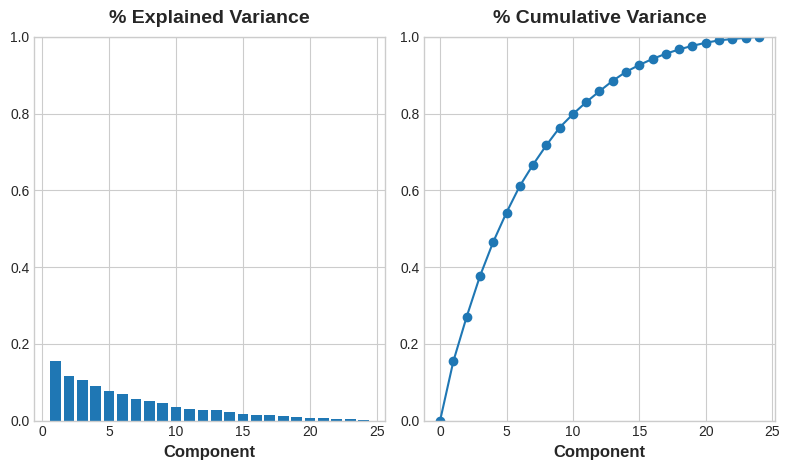

In [50]:
plot_variance(pca);

Now, let's train a decision tree to classify the original data and the PCA data with 19 columns



In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stats_scaled, type1, test_size = 0.25, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('decision with no-PCA accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

decision with no-PCA accuracy score: 0.8557


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca.iloc[:, 0:19], type1, test_size = 0.25, random_state = 42)

In [54]:
from sklearn.ensemble import RandomForestClassifier


# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


# fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score

from sklearn.metrics import accuracy_score

print('decision with PCA accuracy score:: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

decision with PCA accuracy score:: 0.8955


**The decision tree without PCA gave an accuracy of 85.5% and with PCA gave an accuracy of 89.6%.**

**We only used the first 20 columns of the PCA, which captured 97.6% of the original dataset. This shows the original decision overfitted with the remaining 2.4% of the dataset, resulting in a lower accuracy score.**
